In [15]:
## Imports

import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt

In [16]:
#Global Variables

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [17]:
#Import Dataset

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [18]:
class_names = dataset.class_names

In [19]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
len(dataset)

68

In [21]:
68*32

2176

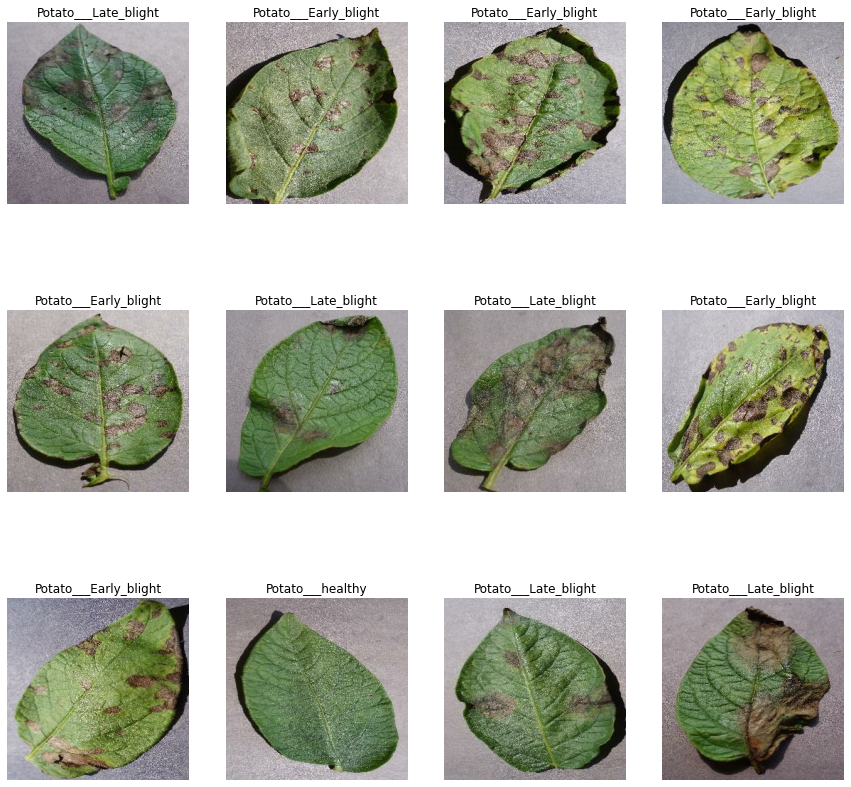

In [22]:
#Visualize the data

plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis("off")

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [25]:
# Train Test Split

train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [12]:
#Perform caching and prefetch to improve the performance

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),    
])

model.build(input_shape = input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [29]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 128s 2s/step - loss: 0.8998 - accuracy: 0.4853 - val_loss: 0.8343 - val_accuracy: 0.5312
Epoch 2/50
54/54 [==============================] - 119s 2s/step - loss: 0.7905 - accuracy: 0.6520 - val_loss: 0.5614 - val_accuracy: 0.8274
Epoch 3/50
54/54 [==============================] - 131s 2s/step - loss: 0.6085 - accuracy: 0.7529 - val_loss: 0.4623 - val_accuracy: 0.8021
Epoch 4/50
54/54 [==============================] - 110s 2s/step - loss: 0.3928 - accuracy: 0.8462 - val_loss: 0.2514 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 107s 2s/step - loss: 0.2454 - accuracy: 0.9049 - val_loss: 0.2149 - val_accuracy: 0.9427
Epoch 6/50
54/54 [==============================] - 121s 2s/step - loss: 0.1914 - accuracy: 0.9266 - val_loss: 0.5634 - val_accuracy: 0.7396
Epoch 7/50
54/54 [==============================] - 119s 2s/step - loss: 0.1651 - accuracy: 0.9331 - val_loss: 0.1864 - val_accuracy: 0.9271
Epoch 8/50
54